For detailed explanation

***https://scalecast.readthedocs.io/en/latest/Forecaster/Forecaster.html***

***https://towardsdatascience.com/exploring-the-lstm-neural-network-model-for-time-series-8b7685aa8cf***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

In [2]:
sns.set(rc={'figure.figsize':(15,8)})

In [3]:
# parser_dates = True or column name in order read that column as datetime object not string format
airPass_df = pd.read_csv("AirPassengers.csv",parse_dates=['Month'])
display(airPass_df)
print(airPass_df.dtypes)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


Month          datetime64[ns]
#Passengers             int64
dtype: object


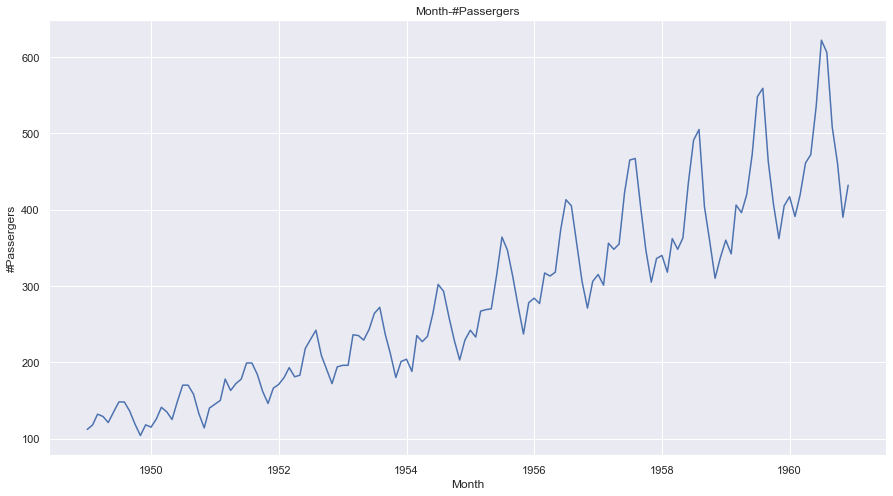

In [4]:
plt.plot(airPass_df["Month"],airPass_df["#Passengers"])
plt.xlabel("Month")
plt.ylabel("#Passergers")
plt.title("Month-#Passergers")
plt.show()


In [7]:
forecast = Forecaster(y=airPass_df["#Passengers"], current_dates = airPass_df["Month"])
print(forecast)

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)


[]

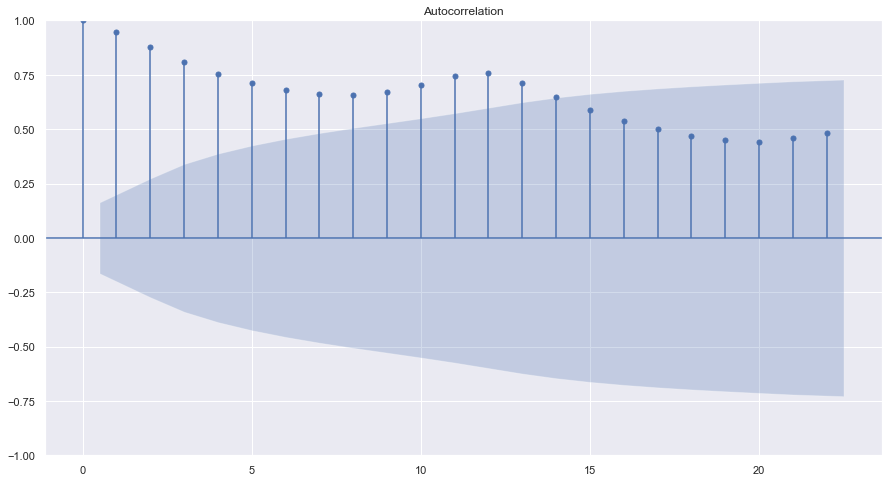

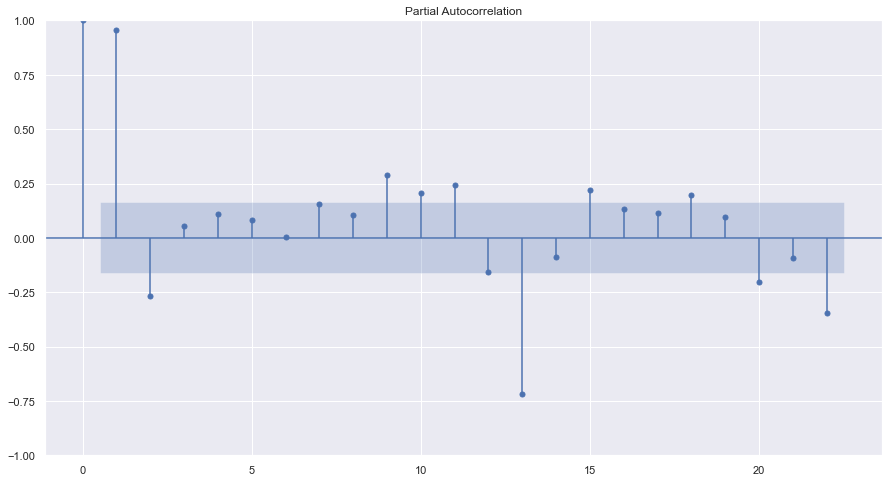

In [11]:
# print autocorrelation and partial autocorrelation

forecast.plot_acf()
forecast.plot_pacf()
plt.plot()

[]

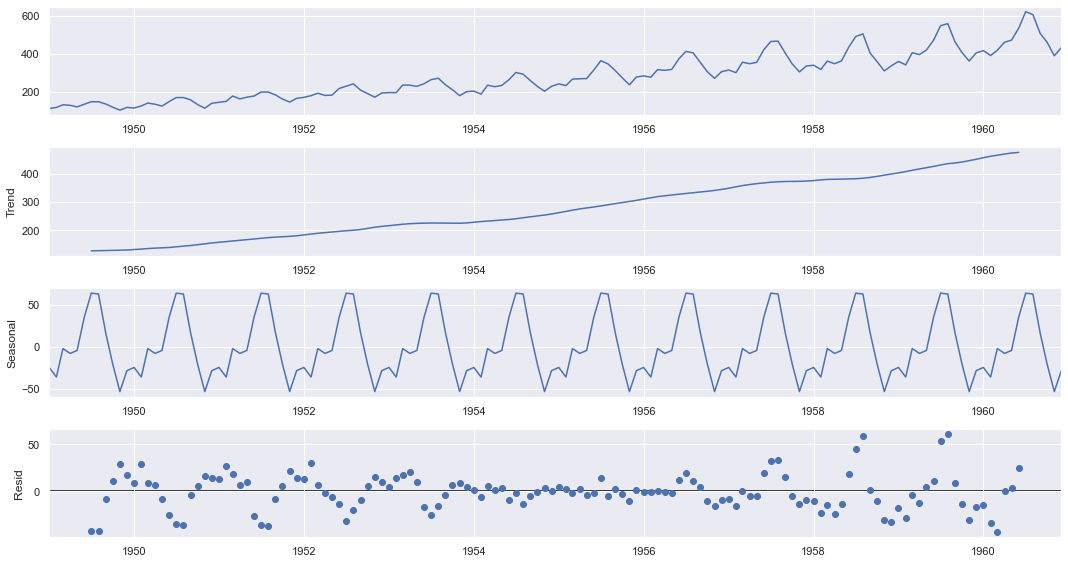

In [13]:
# decomposition
forecast.seasonal_decompose().plot()
plt.plot()

Data has trend and seasonality. Multiplicative model.

In [22]:
chunks = np.split(airPass_df,indices_or_sections=12)
# print(len(chunks))
# print(chunks[0])
for i in range(len(chunks)):
    print("Chunk{} \t mean= {} var= {}".format(i, np.mean(chunks[i]["#Passengers"]), np.var(chunks[i]["#Passengers"])))
    

Chunk0 	 mean= 126.66666666666667 var= 172.55555555555557
Chunk1 	 mean= 139.66666666666666 var= 333.38888888888886
Chunk2 	 mean= 170.16666666666666 var= 311.63888888888886
Chunk3 	 mean= 197.0 var= 483.5
Chunk4 	 mean= 225.0 var= 742.8333333333334
Chunk5 	 mean= 238.91666666666666 var= 1118.0763888888887
Chunk6 	 mean= 284.0 var= 1627.8333333333333
Chunk7 	 mean= 328.25 var= 2099.8541666666665
Chunk8 	 mean= 368.4166666666667 var= 3072.076388888889
Chunk9 	 mean= 381.0 var= 3817.1666666666665
Chunk10 	 mean= 428.3333333333333 var= 4469.88888888889
Chunk11 	 mean= 476.1666666666667 var= 5539.472222222223


In [23]:
adf, pvalue, usedlag, nobs, critical_values, icbest = forecast.adf_test(full_res=True)
print("adf: {}, pvalue: {}".format(adf,pvalue))

adf: 0.8153688792060482, pvalue: 0.991880243437641


pvalue and adf is too high. Not constant mean or variance. Heteroscadicity. Data is not stationary.

In [27]:
forecast.set_test_length(12)
forecast.generate_future_dates(12)
forecast.set_estimator('lstm')

In [28]:
forecast.manual_forecast(call_me="lstm_model")

5/5 [==============================] - 0s 3ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

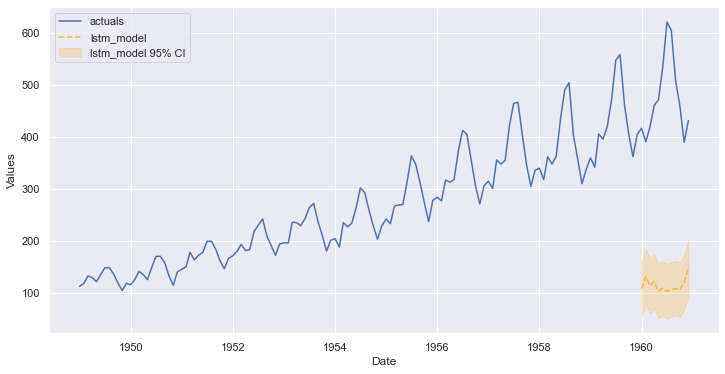

In [29]:
forecast.plot_test_set(ci=True)

4/4 [==============================] - 0s 6ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

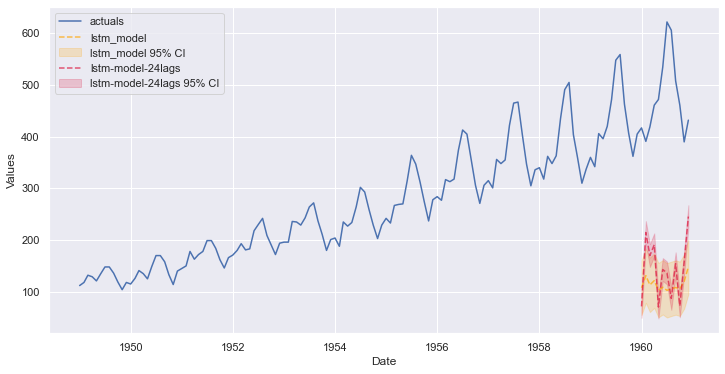

In [30]:
forecast.manual_forecast(call_me="lstm-model-24lags",lags=24)
forecast.plot_test_set(ci=True)

Epoch 1/5
3/3 [==============================] - 4s 460ms/step - loss: 0.4197 - val_loss: 0.1732
Epoch 2/5
3/3 [==============================] - 0s 39ms/step - loss: 0.4072 - val_loss: 0.1647
Epoch 3/5
3/3 [==============================] - 0s 39ms/step - loss: 0.3944 - val_loss: 0.1559
Epoch 4/5
3/3 [==============================] - 0s 41ms/step - loss: 0.3813 - val_loss: 0.1468
Epoch 5/5
1/1 [==============================] - 1s 673ms/step
Epoch 1/5
3/3 [==============================] - 4s 420ms/step - loss: 0.4332 - val_loss: 0.1656
Epoch 2/5
3/3 [==============================] - 0s 41ms/step - loss: 0.4214 - val_loss: 0.1571
Epoch 3/5
3/3 [==============================] - 0s 39ms/step - loss: 0.4093 - val_loss: 0.1484
Epoch 4/5
3/3 [==============================] - 0s 39ms/step - loss: 0.3970 - val_loss: 0.1392
Epoch 5/5
4/4 [==============================] - 0s 5ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

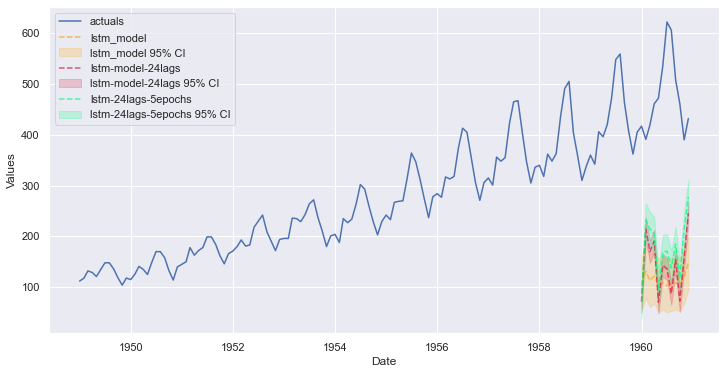

In [32]:
forecast.manual_forecast(call_me="lstm-24lags-5epochs",lags=24,epochs=5,validation_split=.2,shuffle=True)
forecast.plot_test_set(ci=True)

Epoch 1/25
3/3 [==============================] - 12s 1s/step - loss: 0.4575 - val_loss: 0.1823
Epoch 2/25
3/3 [==============================] - 0s 68ms/step - loss: 0.4337 - val_loss: 0.1663
Epoch 3/25
3/3 [==============================] - 0s 67ms/step - loss: 0.4073 - val_loss: 0.1476
Epoch 4/25
3/3 [==============================] - 0s 69ms/step - loss: 0.3761 - val_loss: 0.1313
Epoch 5/25
3/3 [==============================] - 0s 65ms/step - loss: 0.3387 - val_loss: 0.1265
Epoch 6/25
3/3 [==============================] - 0s 65ms/step - loss: 0.3062 - val_loss: 0.1292
Epoch 7/25
3/3 [==============================] - 0s 66ms/step - loss: 0.2821 - val_loss: 0.1330
Epoch 8/25
3/3 [==============================] - 0s 67ms/step - loss: 0.2605 - val_loss: 0.1360
Epoch 9/25
3/3 [==============================] - 0s 65ms/step - loss: 0.2386 - val_loss: 0.1307
Epoch 10/25
3/3 [==============================] - 0s 64ms/step - loss: 0.2152 - val_loss: 0.1157
Epoch 11/25
3/3 [=============

<AxesSubplot:xlabel='Date', ylabel='Values'>

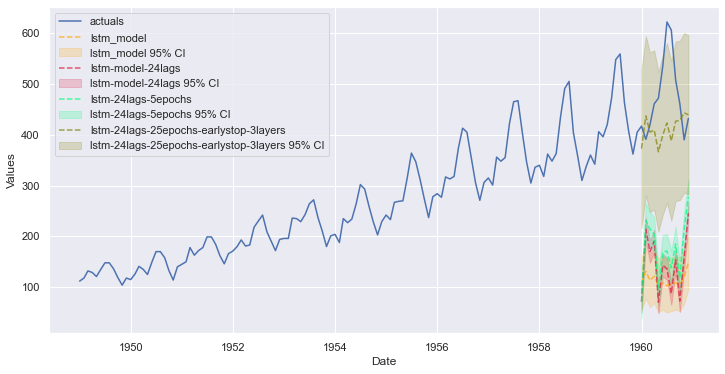

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
forecast.manual_forecast(call_me="lstm-24lags-25epochs-earlystop-3layers",
                        lags=24,
                        epochs=25,
                        validation_split=.2,
                        shuffle=True,
                        callbacks = EarlyStopping(monitor="val_loss",patience=5),
                        lstm_layer_sizes=(16,16,16),
                        dropout=(0,0,0))
forecast.plot_test_set(ci=True)

Epoch 1/15
3/3 [==============================] - 15s 1s/step - loss: 0.4771 - val_loss: 0.1914
Epoch 2/15
3/3 [==============================] - 0s 161ms/step - loss: 0.3533 - val_loss: 0.1314
Epoch 3/15
3/3 [==============================] - 0s 154ms/step - loss: 0.2256 - val_loss: 0.0902
Epoch 4/15
3/3 [==============================] - 0s 144ms/step - loss: 0.1394 - val_loss: 0.0616
Epoch 5/15
3/3 [==============================] - 0s 142ms/step - loss: 0.1231 - val_loss: 0.0858
Epoch 6/15
3/3 [==============================] - 0s 147ms/step - loss: 0.1224 - val_loss: 0.0651
Epoch 7/15
3/3 [==============================] - 0s 144ms/step - loss: 0.1140 - val_loss: 0.0535
Epoch 8/15
3/3 [==============================] - 0s 140ms/step - loss: 0.1057 - val_loss: 0.0545
Epoch 9/15
3/3 [==============================] - 0s 136ms/step - loss: 0.1002 - val_loss: 0.0578
Epoch 10/15
3/3 [==============================] - 0s 141ms/step - loss: 0.0994 - val_loss: 0.0629
Epoch 11/15
3/3 [====

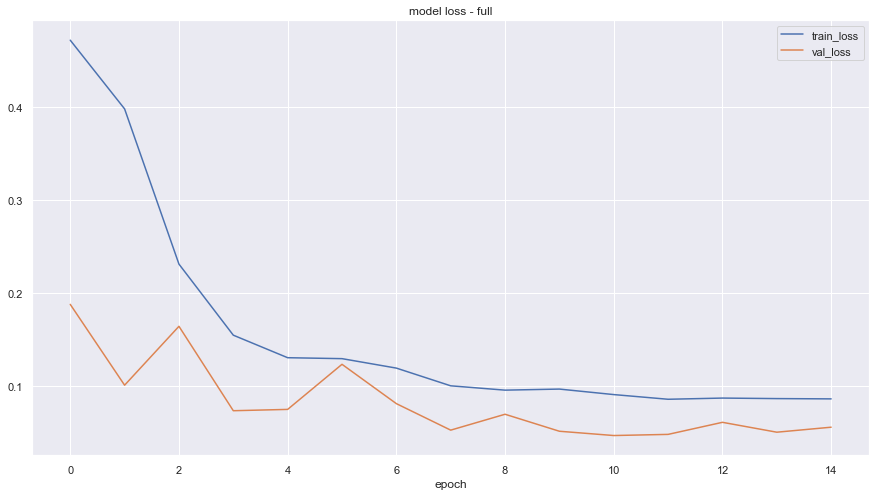

3/3 [==============================] - 0s 30ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

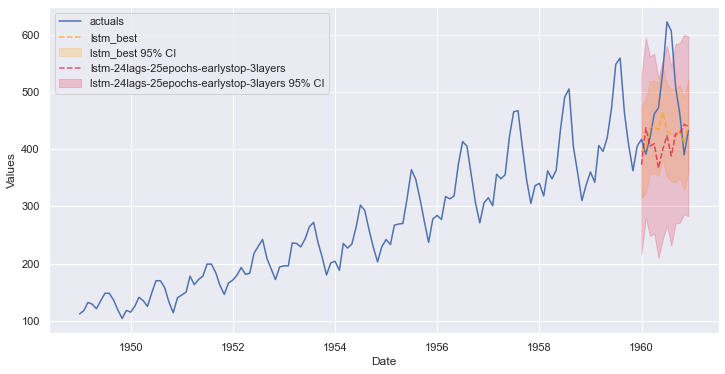

In [35]:
forecast.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
forecast.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)